## Data Preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("market_sales.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# rename the columns
data.rename(columns = {"Customer type": "CustomerType",
                       "Product line": "ProductCateg", 
                       "Unit price": "UnitPrice",
                       "cogs": "Cogs",
                       "gross margin percentage": "GrossMarginPerc",
                       "gross income": "GrossIncome", 
                       "Invoice ID": "InvoiceID", 
                       "Payment": "PaymentType"}, inplace = True)
data

,InvoiceID,Branch,City,CustomerType,Gender,ProductCateg,UnitPrice,Quantity,Tax 5%,Total,Date,Time,PaymentType,Cogs,GrossMarginPerc,GrossIncome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
# check null data
data.isnull().sum()

InvoiceID          0
Branch             0
City               0
CustomerType       0
Gender             0
ProductCateg       0
UnitPrice          0
Quantity           0
Tax 5%             0
Total              0
Date               0
Time               0
PaymentType        0
Cogs               0
GrossMarginPerc    0
GrossIncome        0
Rating             0
dtype: int64

In [5]:
# creating Year, Month, Day column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
data['Date']= pd.to_datetime(data['Date'])

# create Year, Month, Day columns
data['Year'] = data["Date"].dt.year
data['Month'] = data["Date"].dt.month
data['Day'] = data["Date"].dt.day

In [6]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [7]:
data['DayNames'] = data['Date'].apply(lambda x: findDay(x))
data.head()

,InvoiceID,Branch,City,CustomerType,Gender,ProductCateg,UnitPrice,Quantity,Tax 5%,Total,...,Time,PaymentType,Cogs,GrossMarginPerc,GrossIncome,Rating,Year,Month,Day,DayNames
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,Friday


## Exploratory Data Analysis and Data Visualization

In [8]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceID        1000 non-null   object        
 1   Branch           1000 non-null   object        
 2   City             1000 non-null   object        
 3   CustomerType     1000 non-null   object        
 4   Gender           1000 non-null   object        
 5   ProductCateg     1000 non-null   object        
 6   UnitPrice        1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Tax 5%           1000 non-null   float64       
 9   Total            1000 non-null   float64       
 10  Date             1000 non-null   datetime64[ns]
 11  Time             1000 non-null   object        
 12  PaymentType      1000 non-null   object        
 13  Cogs             1000 non-null   float64       
 14  GrossMarginPerc  1000 non-null   float64 

In [9]:
# statistical information about numerical data
data.drop(["Year", "Month", "Day", "DayNames", "Date"], axis=1).describe()

,UnitPrice,Quantity,Tax 5%,Total,Cogs,GrossMarginPerc,GrossIncome,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [10]:
# statistical information about categorical data
data[["InvoiceID", "Branch", "City", "CustomerType", "Gender", "ProductCateg", "PaymentType"]].describe()

,InvoiceID,Branch,City,CustomerType,Gender,ProductCateg,PaymentType
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


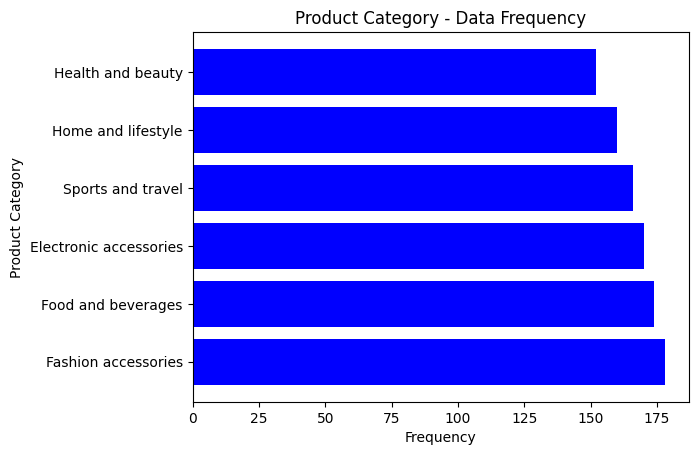

Number of Samples According to Product Category 
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: ProductCateg, dtype: int64


In [11]:
# Number of sample according to ProductCateg
plt.figure()
plt.barh(data["ProductCateg"].value_counts().index, data["ProductCateg"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.title("Product Category - Data Frequency")
plt.show()
print(f"Number of Samples According to Product Category \n{data['ProductCateg'].value_counts()}")

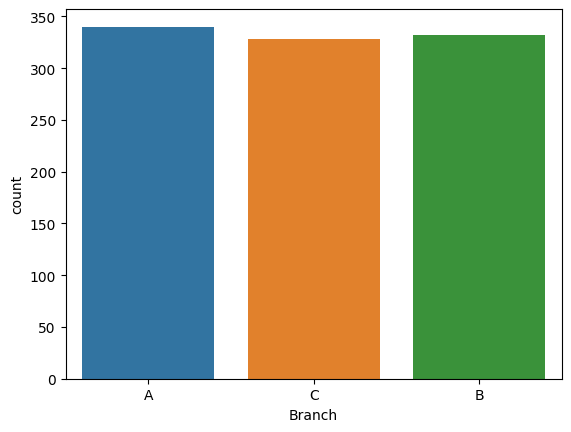

Number of samples according to Branch 
A    340
B    332
C    328
Name: Branch, dtype: int64


In [12]:
# Number of samples according to Branch
sns.countplot(x="Branch", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples according to Branch \n{data['Branch'].value_counts()}")

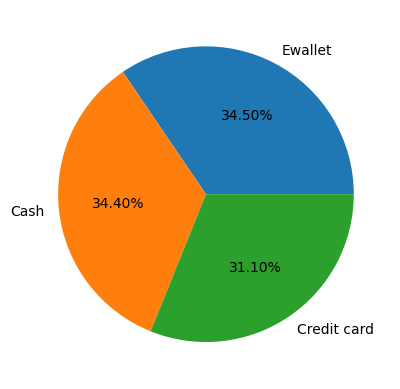

In [13]:
# plot a pie chart and see percentages of PaymentType
plt.pie(data['PaymentType'].value_counts(), labels=data['PaymentType'].unique(), autopct='%1.2f%%')
plt.show() 

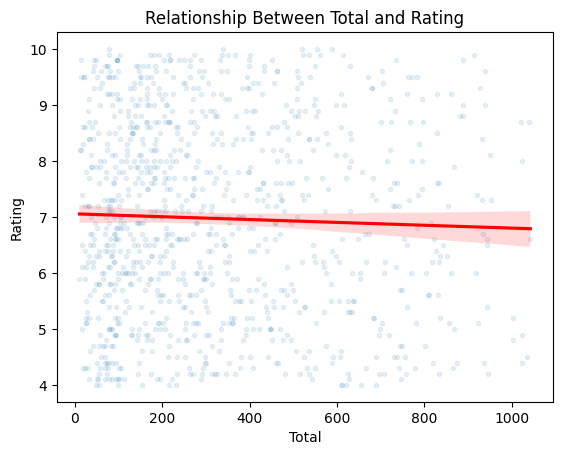

In [14]:
# see the relationship between Total and Rating
sns.regplot(x='Total', y='Rating', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Total and Rating')
plt.show()

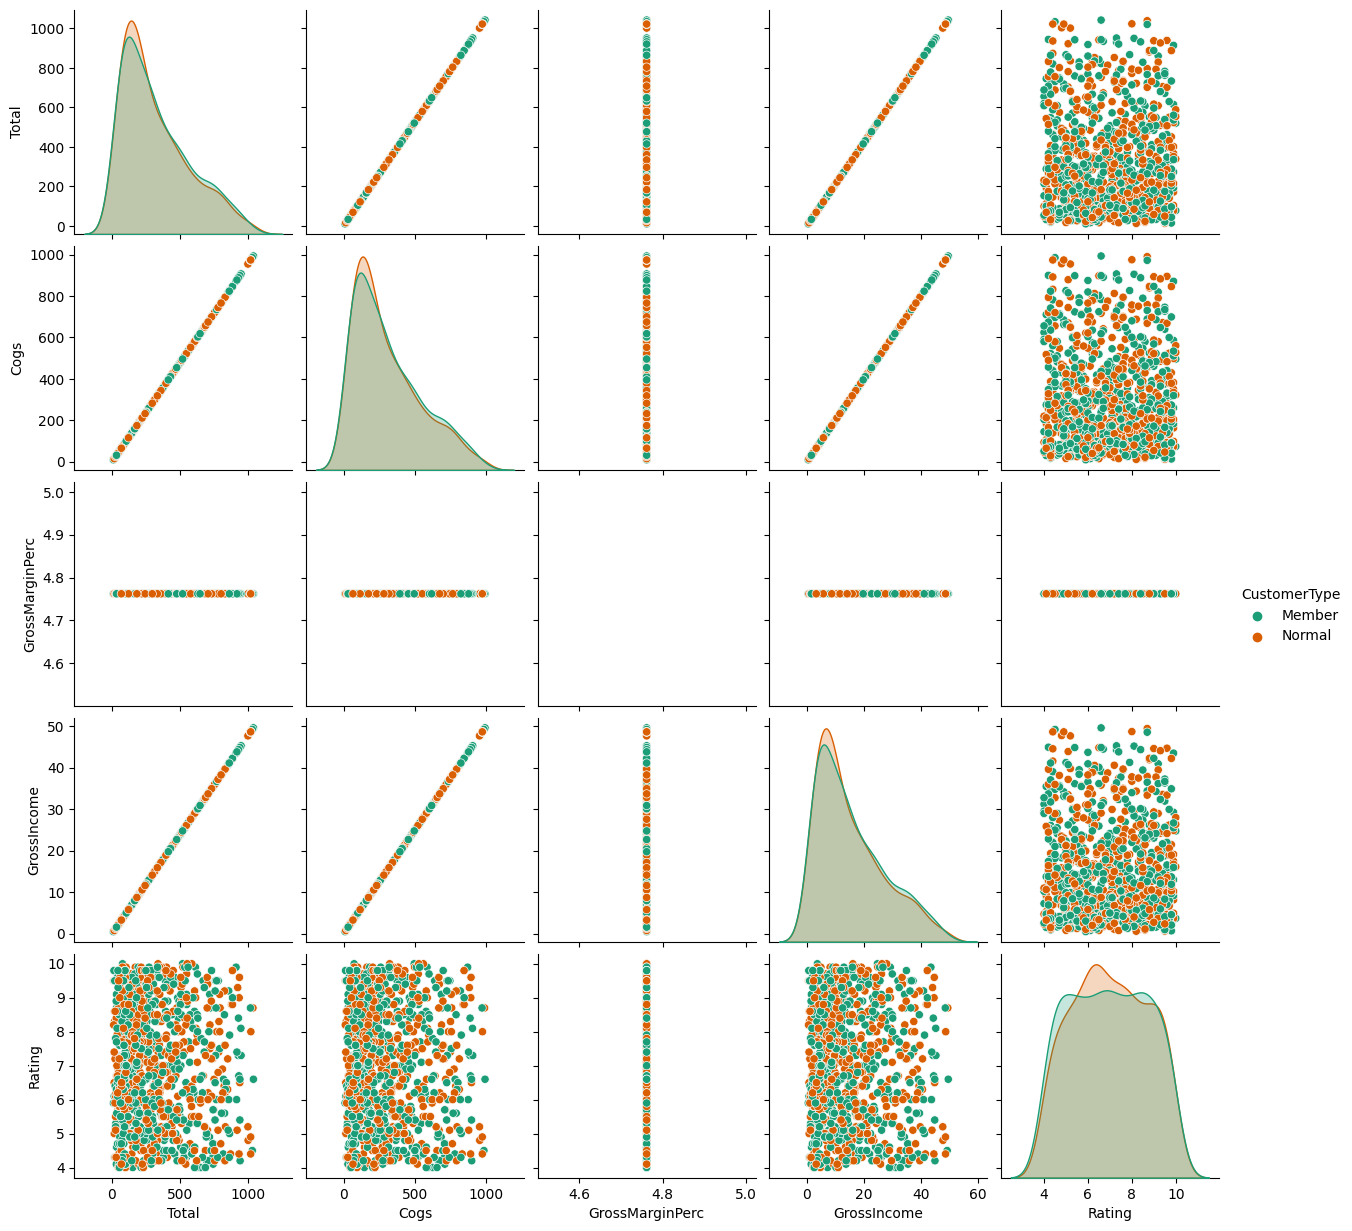

In [15]:
# see pairplot for relation between the columns
sns.pairplot(data[["Total", "Cogs", "GrossMarginPerc", "GrossIncome", "Rating", "CustomerType"]],
             hue="CustomerType", palette='Dark2')
plt.show()

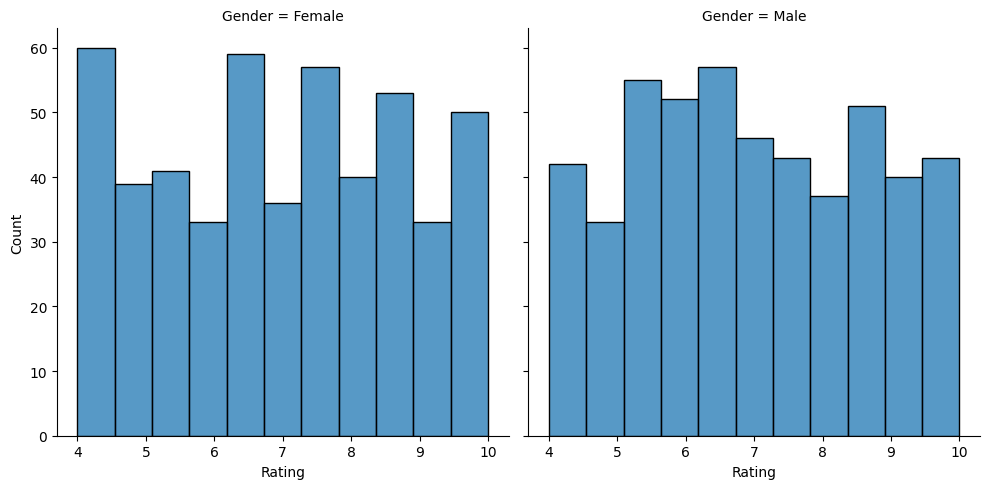

In [16]:
sns.displot(data, x="Rating", col="Gender", multiple="dodge")
plt.show()

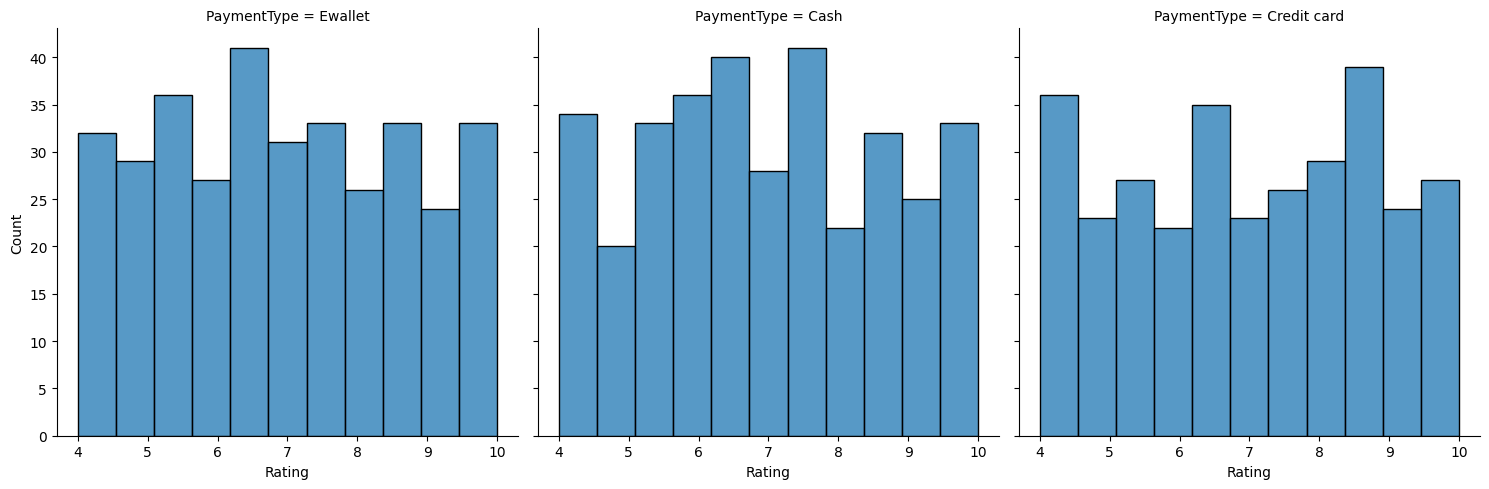

In [17]:
sns.displot(data, x="Rating", col="PaymentType", multiple="dodge")
plt.show()

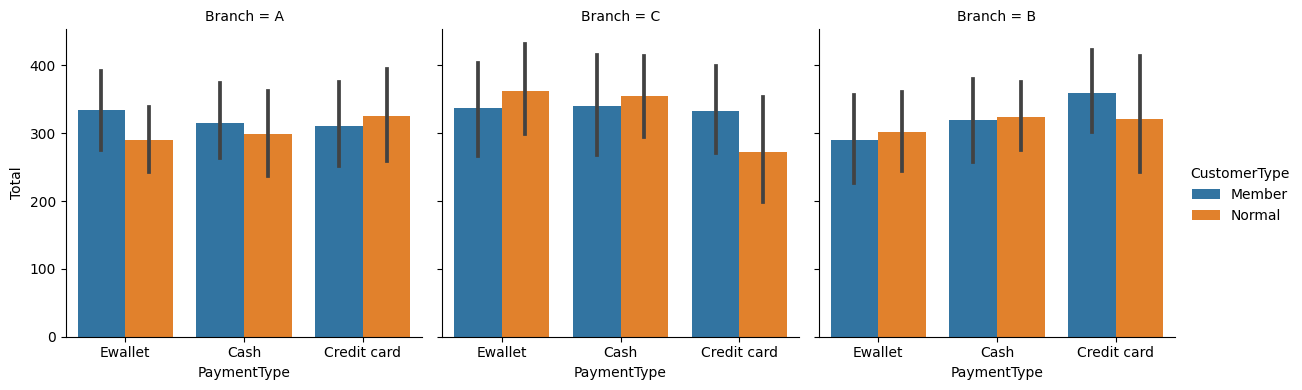

In [18]:
sns.catplot(x="PaymentType", y="Total",  hue="CustomerType", col="Branch",
                data=data, kind="bar",height=4)
plt.show()

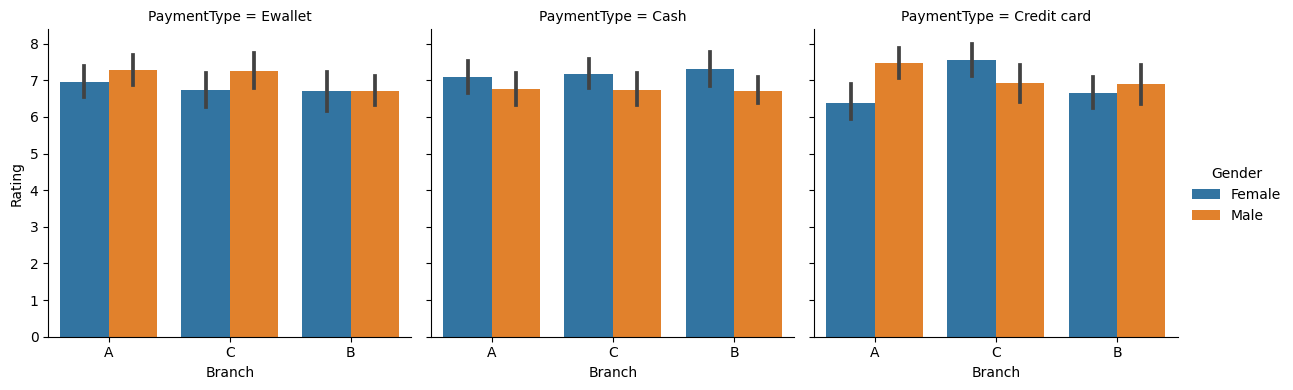

In [19]:
sns.catplot(x="Branch", y="Rating",  hue="Gender", col="PaymentType",
                data=data, kind="bar",height=4)
plt.show()

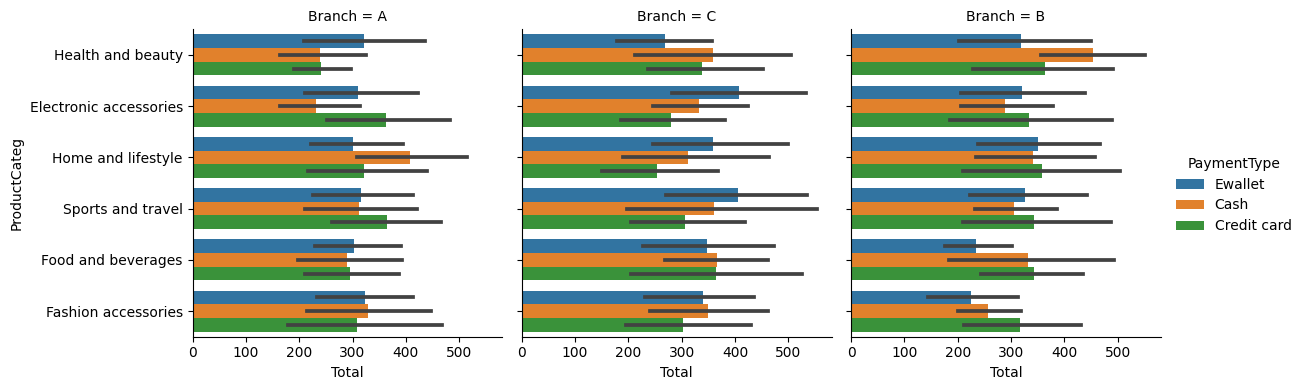

In [20]:
sns.catplot(x="Total", y="ProductCateg",  hue="PaymentType", col="Branch",
                data=data, kind="bar", height=4, orient="h")
plt.show()

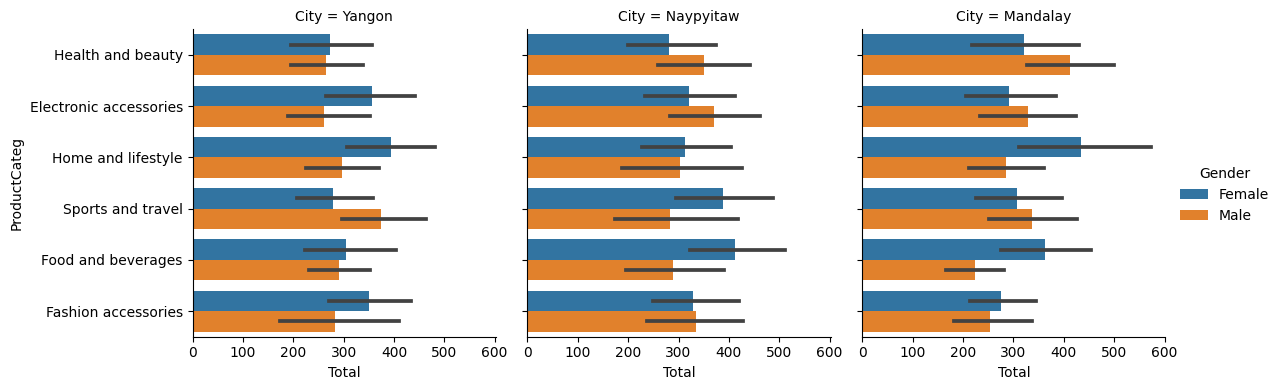

In [21]:
sns.catplot(x="Total", y="ProductCateg",  hue="Gender", col="City",
                data=data, kind="bar", height=4, orient="h")
plt.show()

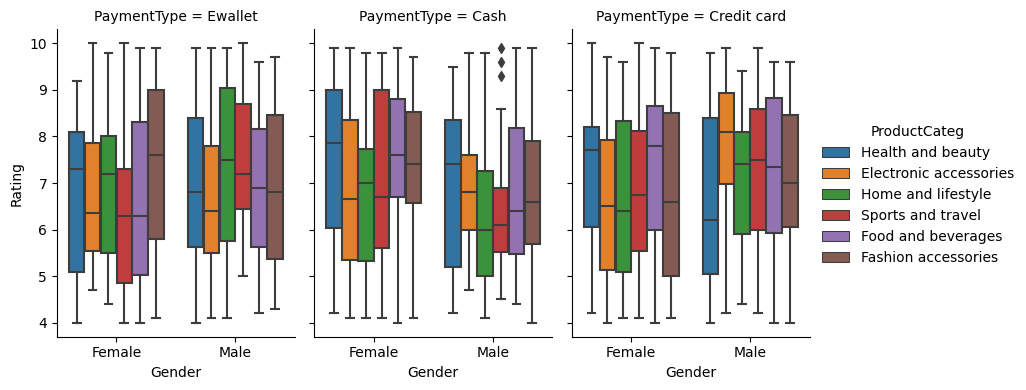

In [22]:
sns.catplot(x="Gender", y="Rating", hue="ProductCateg", col="PaymentType",
            data=data, kind="box",height=4, aspect=.7);

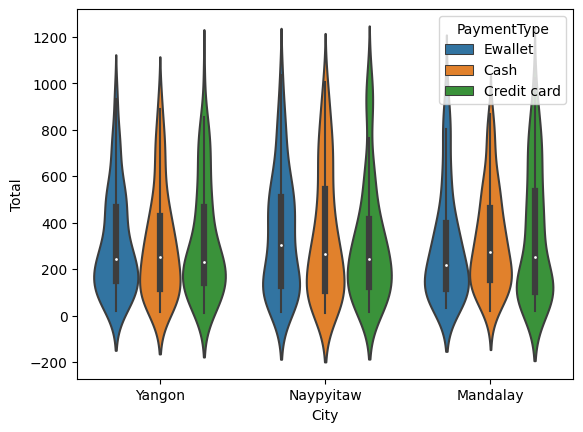

In [23]:
sns.violinplot(x="City", y="Total", data=data, hue="PaymentType")
plt.show()

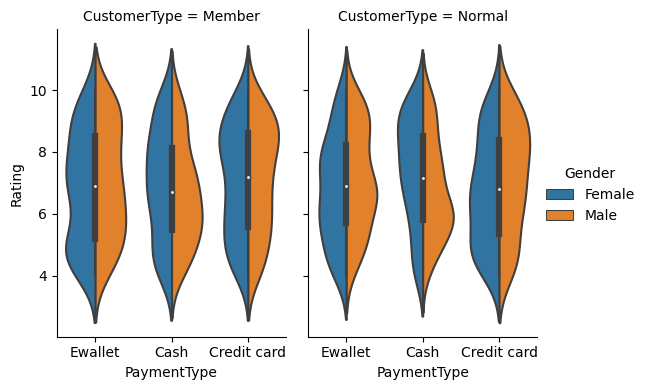

In [24]:
sns.catplot(x="PaymentType", y="Rating",
                hue="Gender", col="CustomerType",
                data=data, kind="violin", split=True,
                height=4, aspect=.7)
plt.show()

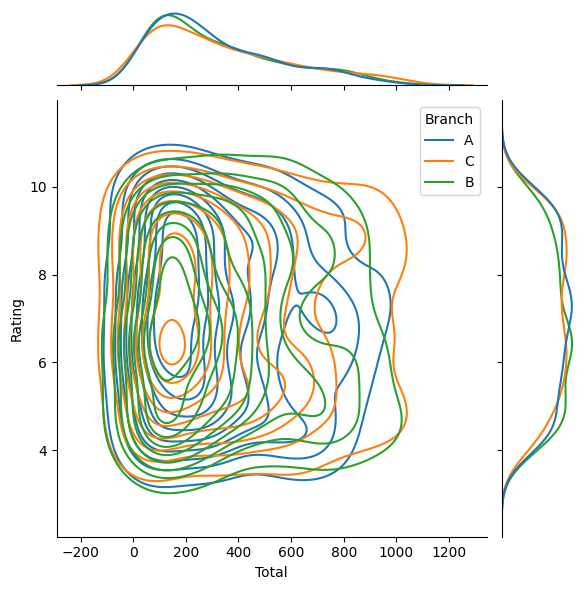

In [25]:
sns.jointplot(
    data=data,
    x="Total", y="Rating", hue="Branch",
    kind="kde")
plt.show()

## Monthly Total Sales Analysis by Branch

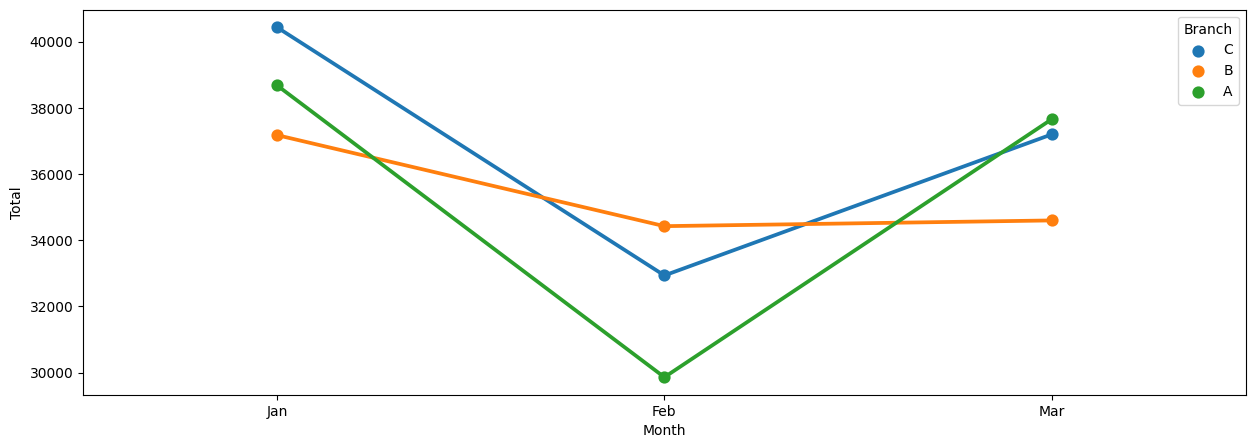

In [26]:
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[["Total", 'Month',
                'Branch',]].groupby(["Branch","Month"]).sum().reset_index().sort_values(by=['Branch',
                                                                                            'Month'], ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="Total", data=df, hue='Branch', order=["Jan", "Feb", "Mar"])
plt.show()

## Monthly Total Sales Analysis by Product Category

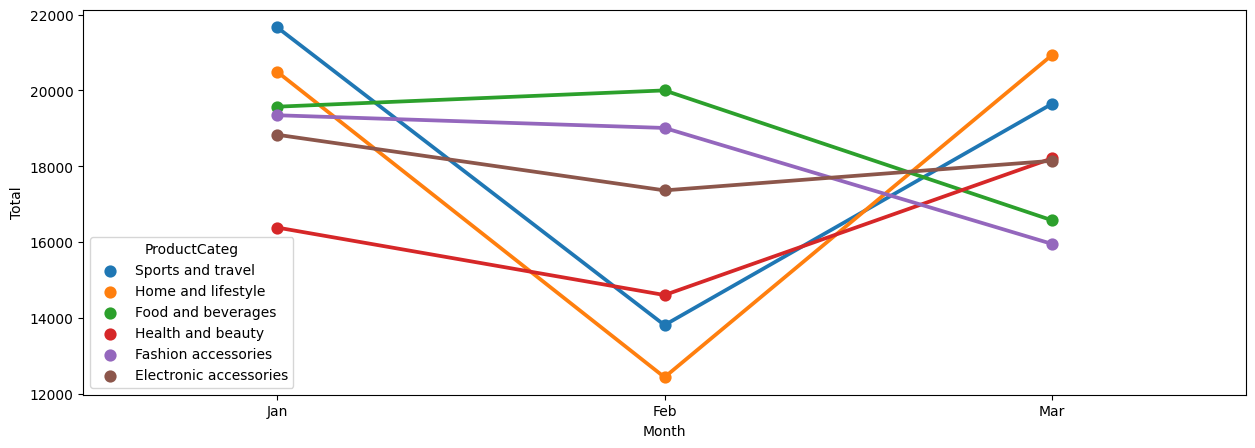

In [27]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[["Total", 'Month',
                'ProductCateg']].groupby(["ProductCateg", "Month"]).sum().reset_index().sort_values(by=['Total'],
                                                                                                    ascending=True)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="Total", data=df, hue="ProductCateg")
plt.show()

## Weekly Total Sales Analysis by CustomerType

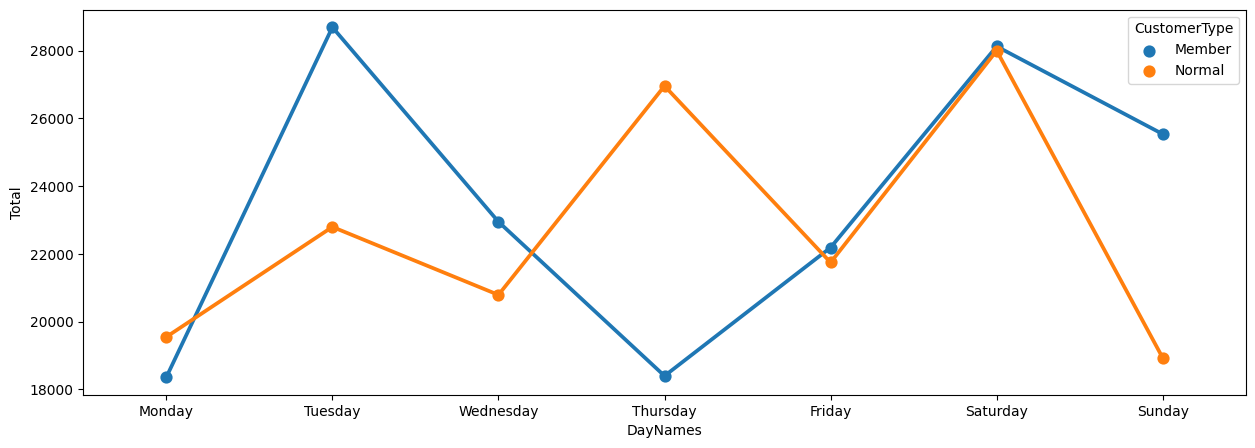

In [28]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df = data[["Total", 'DayNames',
           'CustomerType']].groupby(["CustomerType","DayNames"]).sum().reset_index().sort_values(by=['CustomerType',
                                                                                         'DayNames'], ascending=True)
df = df.iloc[df['DayNames'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='DayNames', y="Total", data=df, hue="CustomerType")
plt.show()

## Weekly Total Sales Analysis by PaymentType

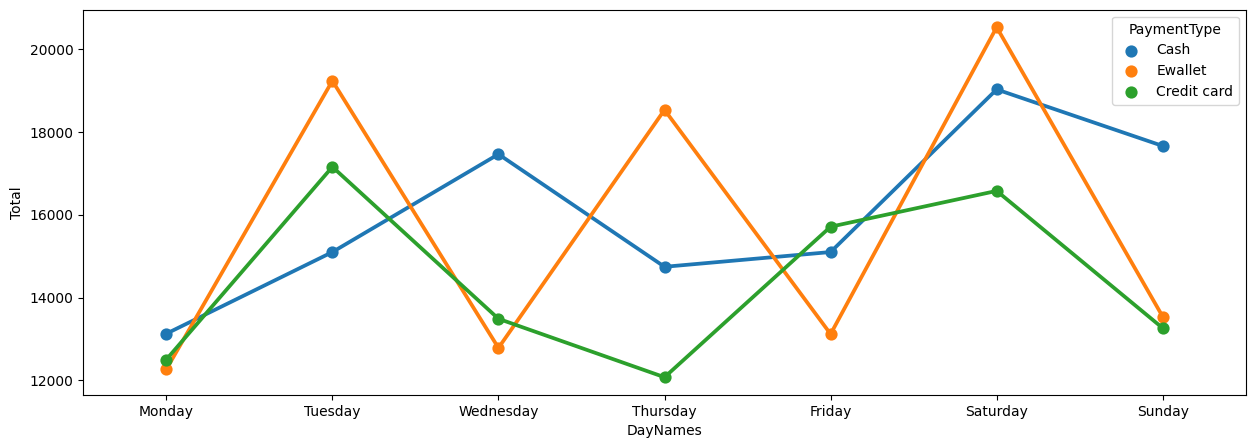

In [29]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df = data[["Total", 'DayNames',
           'PaymentType']].groupby(["PaymentType","DayNames"]).sum().reset_index().sort_values(by=['PaymentType',
                                                                                         'DayNames'], ascending=True)
df = df.iloc[df['DayNames'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='DayNames', y="Total", data=df, hue="PaymentType")
plt.show()

## Daily Total Sales Analysis by Gender

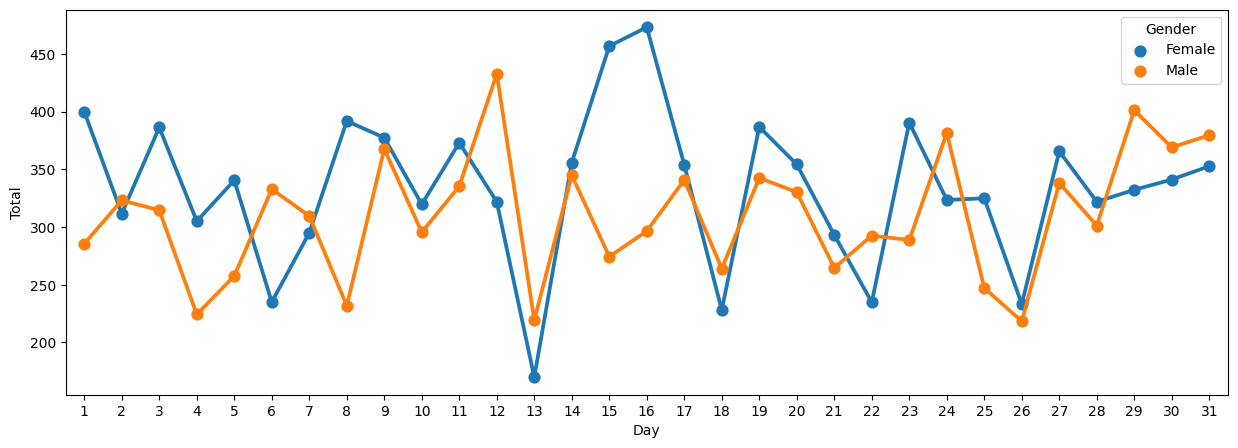

In [30]:
df = data[["Total",'Day', "Gender"]].groupby(["Day",
                                              "Gender"]).mean().reset_index().sort_values(by=['Day'], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Total", data=df, hue="Gender")
plt.show()

## Daily Sales Analysis of Product Categories

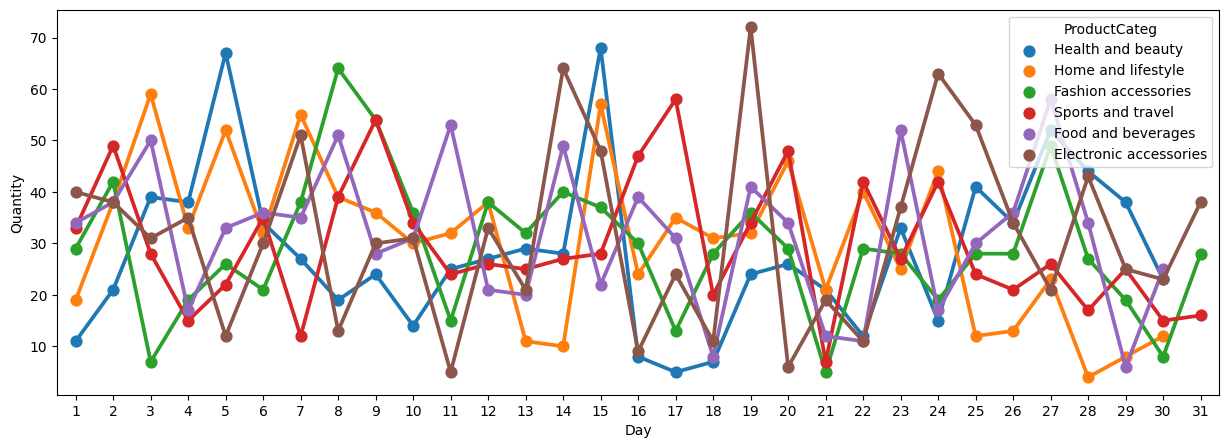

In [31]:
df = data[["Quantity",
           "ProductCateg", "Day"]].groupby(["Day",
                                            "ProductCateg"]).sum().reset_index().sort_values(by=["Day",
                                                                                                 "Quantity"], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Quantity", data=df, hue="ProductCateg")
plt.show()

## Preprocessing

In [32]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceID        1000 non-null   object        
 1   Branch           1000 non-null   object        
 2   City             1000 non-null   object        
 3   CustomerType     1000 non-null   object        
 4   Gender           1000 non-null   object        
 5   ProductCateg     1000 non-null   object        
 6   UnitPrice        1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Tax 5%           1000 non-null   float64       
 9   Total            1000 non-null   float64       
 10  Date             1000 non-null   datetime64[ns]
 11  Time             1000 non-null   object        
 12  PaymentType      1000 non-null   object        
 13  Cogs             1000 non-null   float64       
 14  GrossMarginPerc  1000 non-null   float64 

In [33]:
# drop some unnecessary columns
data.drop(["DayNames", "Date", "Year", "Month", "Day", "Time", "InvoiceID", "City"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Branch           1000 non-null   object 
 1   CustomerType     1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   ProductCateg     1000 non-null   object 
 4   UnitPrice        1000 non-null   float64
 5   Quantity         1000 non-null   int64  
 6   Tax 5%           1000 non-null   float64
 7   Total            1000 non-null   float64
 8   PaymentType      1000 non-null   object 
 9   Cogs             1000 non-null   float64
 10  GrossMarginPerc  1000 non-null   float64
 11  GrossIncome      1000 non-null   float64
 12  Rating           1000 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB


In [34]:
# use label encoder for CustomerType
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [35]:
data["CustomerType"] = labelEncoder(data["CustomerType"])

Encoding Approach:
Member  ==>  0
Normal  ==>  1


In [36]:
# for other categorical variables use OneHotEncoder
data = pd.get_dummies(data, columns=['Branch', "Gender", "ProductCateg", "PaymentType"])
data.head(3)

,CustomerType,UnitPrice,Quantity,Tax 5%,Total,Cogs,GrossMarginPerc,GrossIncome,Rating,Branch_A,...,Gender_Male,ProductCateg_Electronic accessories,ProductCateg_Fashion accessories,ProductCateg_Food and beverages,ProductCateg_Health and beauty,ProductCateg_Home and lifestyle,ProductCateg_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_Ewallet
0,0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,1,...,0,0,0,0,1,0,0,0,0,1
1,1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,...,0,1,0,0,0,0,0,1,0,0
2,1,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,1,...,1,0,0,0,0,1,0,0,1,0


In [37]:
# create input and output
X = data.drop('CustomerType', axis = 1)
y = data['CustomerType']

In [38]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (850, 22)
y_train: (850,)
X_test: (150, 22)
y_test: (150,)


## Model Training and Evaluation

In [39]:
# import classifiers and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def allClassifiers(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier 
    and comparison plot for classifiers according to accuracy
    """
    
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(),
                   BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):
        """
        :param classifier: classifier model function
        :return: accuracy score for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):
        """
        :param classifier: classifier model function
        :return: confusion matrix and classification report for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include classifier and evaluation scores
        :return: plot of performance comparison of classifiers
        """
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)

*************************************************************************
SVC Accuracy Score = 0.49333333333333335
Confusion Matrix and Classification Report for SVC() Classifier
[[24 54]
 [22 50]]
              precision    recall  f1-score   support

           0       0.52      0.31      0.39        78
           1       0.48      0.69      0.57        72

    accuracy                           0.49       150
   macro avg       0.50      0.50      0.48       150
weighted avg       0.50      0.49      0.47       150

*************************************************************************
DecisionTreeClassifier Accuracy Score = 0.5133333333333333
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[41 37]
 [34 38]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        78
           1       0.51      0.53      0.52        72

    accuracy                           0.53       150
   macro avg       0.5

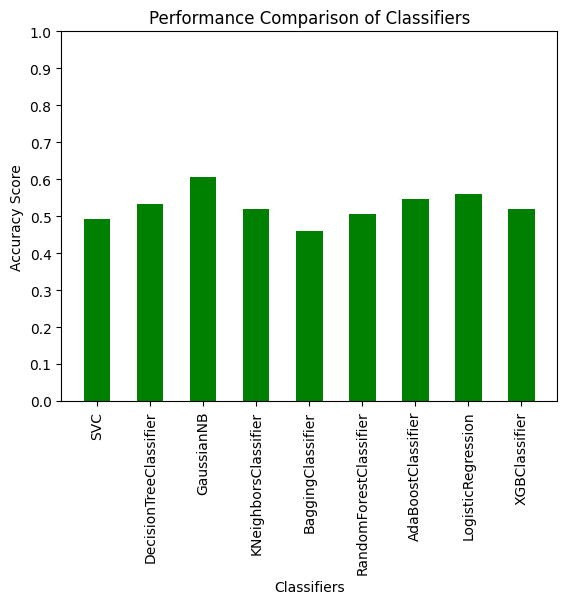

In [40]:
allClassifiers(X_train, X_test, y_train, y_test)